# Music Recommendation

By - Aastha Singh

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt



from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
df1 = pd.read_csv("songs.csv",nrows=5000)
df2= pd.read_csv("song_extra_info.csv",nrows=5000)
df3= pd.read_csv("members.csv",nrows=5000)
df4= pd.read_csv("train.csv",nrows=5000)
df1_4 = pd.merge(df4,df1, on='song_id', how='left')
df1_4_2 = pd.merge(df1_4, df2, on='song_id', how='left')
df = pd.merge(df1_4_2, df3, on='msno', how='left')

In [3]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,5000.000000,109.000000,109.000000,686.000000,686.000000,686.000000,6.860000e+02,6.860000e+02
mean,0.798200,250756.009174,15.532110,8.311953,20.581633,6.706997,2.012891e+07,2.017360e+07
std,0.401384,55387.844906,19.314919,5.744339,15.406460,2.310909,2.463700e+04,4.329746e+03
min,0.000000,66247.000000,-1.000000,1.000000,0.000000,3.000000,2.004072e+07,2.017013e+07
25%,1.000000,215040.000000,3.000000,1.000000,0.000000,4.000000,2.011055e+07,2.017091e+07
50%,1.000000,244636.000000,3.000000,9.000000,24.000000,7.000000,2.013121e+07,2.017093e+07
75%,1.000000,283898.000000,31.000000,13.000000,33.000000,9.000000,2.015061e+07,2.018020e+07
max,1.000000,458605.000000,52.000000,22.000000,64.000000,13.000000,2.016112e+07,2.018101e+07


In [4]:
df.isnull().sum()

msno                         0
song_id                      0
source_system_tab           14
source_screen_name         125
source_type                 14
target                       0
song_length               4891
genre_ids                 4896
artist_name               4891
composer                  4915
lyricist                  4936
language                  4891
name                      4935
isrc                      4941
city                      4314
bd                        4314
gender                    4548
registered_via            4314
registration_init_time    4314
expiration_date           4314
dtype: int64

In [5]:
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


In [6]:
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [7]:
df=df.fillna(value=0)

In [8]:
df.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
4995,nH1t3DQT9gwRxkQ00vQ4tZHLsVkVHiz/FyYOdM3SbbA=,r0L/P3z905IMYFiwrfhCWEi82VUCTONy0TLuu/Zg2qw=,radio,Radio,radio,1,0.0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4996,LzrMDdjVFTDn2e1cq8pA+19UgFwqeYgughDG/Ax9fcw=,4EymaNIYUP/BnT0B1mKje2uHatSOU1gHkKShh4yNV0M=,my library,Local playlist more,local-library,1,0.0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4997,LzrMDdjVFTDn2e1cq8pA+19UgFwqeYgughDG/Ax9fcw=,/iSIhUhty2QWZMFvc2REo+z/Td0/AMLaIJCENh73oYY=,my library,Local playlist more,local-library,1,0.0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4998,LzrMDdjVFTDn2e1cq8pA+19UgFwqeYgughDG/Ax9fcw=,993Gt9IIvVIUw57KMvhyqgOUoH0VWKQbbFm89mOtk/A=,my library,Local playlist more,local-library,1,0.0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4999,lUBY3ZofGIMSN5TzcSM/5qF8LVAP3zrZNd6UFTWtZzw=,ipH8Ff6lJyGGZ1ma8358EFbFfMcVFgzqgjCpwZJt+O8=,discover,0,top-hits-for-artist,1,244636.0,458,王力宏 (Leehom Wang),Leehom Wang,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.drop(columns = ['registration_init_time_year','registration_init_time_month','registration_init_time_day','expiration_date_year','expiration_date_month','expiration_date_day'], inplace= True)

In [10]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,0.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,0.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,0.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,0.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,0.0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0


In [11]:
label_encoder =LabelEncoder()
one_hot = OneHotEncoder()

for i in df.columns :
    df[i] = label_encoder.fit_transform(df[i].astype(str))

In [12]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,271,727,2,6,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,554,2112,4,7,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,554,1174,4,7,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,554,216,4,7,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,271,330,2,6,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


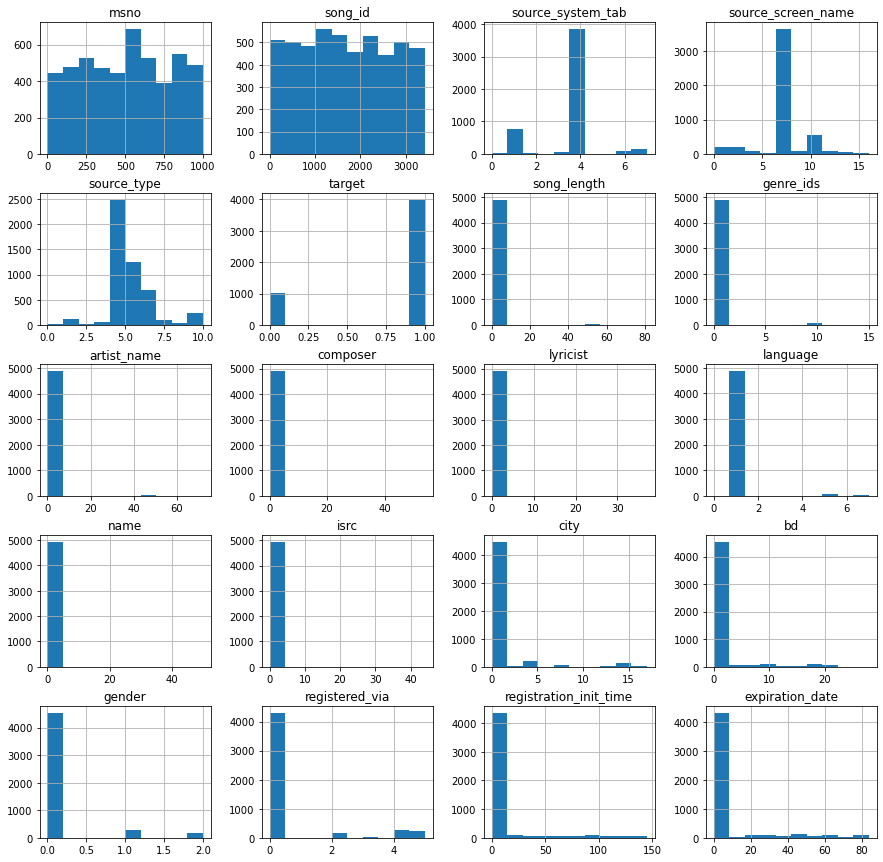

In [13]:
df.hist(figsize=(15,15))
plt.show()

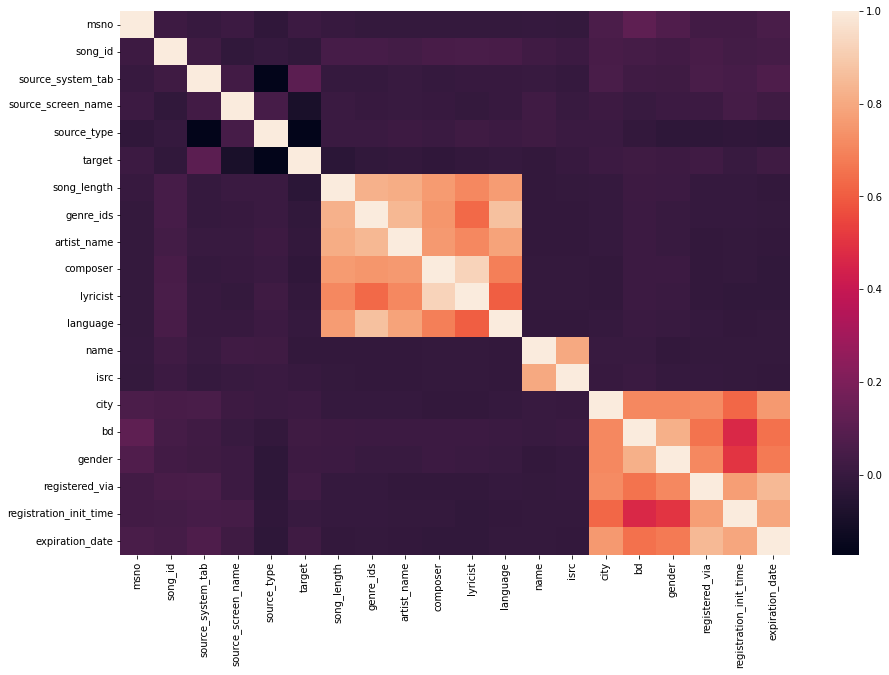

In [14]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr())
plt.show()

In [15]:
X = df.drop('target', axis = 1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
pred_rf = rf.predict(X_test)

In [18]:
rf.score(X_test, y_test)

0.8344

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.44      0.51       250
           1       0.87      0.93      0.90      1000

    accuracy                           0.83      1250
   macro avg       0.75      0.69      0.71      1250
weighted avg       0.82      0.83      0.82      1250



In [20]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, pred_rf)
print(cf)

[[109 141]
 [ 66 934]]
